<a href="https://colab.research.google.com/github/gyeongseoMin/DL/blob/main/20203060%EB%AF%BC%EA%B2%BD%EC%84%9C_SW_22_BC_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터셋 다운로드

In [ ]:
# download dataset by url link
!wget -O dataset.zip https://www.dropbox.com/s/pj6zfdf5f5l6rhe/imitation_22ver.zip?dl=0
# unzip zip file
!unzip -qq dataset.zip
# delete downloaded zip file
!rm -rf dataset.zip
# rename data path
!mv imitation_22ver/ dataset/

--2022-12-13 12:23:42--  https://www.dropbox.com/s/pj6zfdf5f5l6rhe/imitation_22ver.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pj6zfdf5f5l6rhe/imitation_22ver.zip [following]
--2022-12-13 12:23:43--  https://www.dropbox.com/s/raw/pj6zfdf5f5l6rhe/imitation_22ver.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfcec8c587bc03aeb0f5b9a216f.dl.dropboxusercontent.com/cd/0/inline/ByjXkgnmoM9Q_6CZ1s9T_TntGyhyzMsislrSV8jVSUmUCfQow4bdkTsVI37tk1do66DCglWiZYwU3Or79WoDqmOFHdhdwxB5d23C7CHFP5YqjfMrFE5YSFo3ihSpk5geC7fCSsWzfJS4579BsxQ868JBsgLjq-znv-QKK6PcbHjWkg/file# [following]
--2022-12-13 12:23:43--  https://ucfcec8c587bc03aeb0f5b9a216f.dl.dropboxusercontent.com/cd/0/inline/ByjXkgnmoM9Q_6CZ1s9T_TntGyhyzMsislrSV8jVSUmUCfQow4b

# 2. EDA (Exploratory Data Analysis)

In [ ]:
# 데이터 기본 디렉토리 지정
import os
data_dir = os.path.join(os.getcwd(), 'dataset') ## os.getcwd() : 현재 위치(코랩 현재 파일 위치), -> 현재 위치/dataset 경로로 지정
print(os.listdir(data_dir))

['.DS_Store', 'label.csv', 'images']


In [ ]:
# label.csv 파일 탐색
label_path = os.path.join(data_dir, 'label.csv')

import pandas as pd
label_df = pd.read_csv(label_path)
label_df

,img,steer
0,329571.jpg,0.019361
1,329580.jpg,0.090791
2,329590.jpg,0.090791
3,329603.jpg,-0.007297
4,329610.jpg,-0.056953
...,...,...
1647,411920.jpg,0.001657
1648,411930.jpg,0.024448
1649,411940.jpg,0.027501
1650,411950.jpg,0.036455


count    1652.000000
mean       -0.048909
std         0.130272
min        -0.500000
25%        -0.111353
50%        -0.013198
75%         0.021193
max         0.500000
Name: steer, dtype: float64


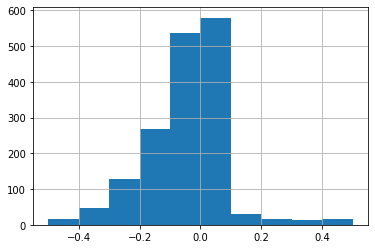

In [ ]:
# steer 값 탐색
print(label_df['steer'].describe())

label_df['steer'].hist()
## 0 -> 직진
## 왼쪽 데이터가 많음. 
## 불균형 해결하는 방법 생각해보기

count    2165.000000
mean        0.008520
std         0.159629
min        -0.500000
25%        -0.085449
50%         0.010000
75%         0.098680
max         0.500000
Name: steer, dtype: float64


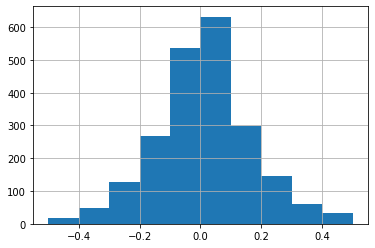

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


def load_image(img_name):
    # https://m.blog.naver.com/nostresss12/221950215408
    path = os.path.join(data_dir, 'images', img_name)
    img_data = Image.open(path).convert("RGB")

    return img_data


new_jpg = 10000
def visualize_augm(img_name, label, new_jpg):

    img = load_image(img_name)
    im1 = img.transpose(Image.FLIP_LEFT_RIGHT)
    label *= -1.0
    new_jpg = str(new_jpg)+'.jpg'
    path = os.path.join(data_dir,'images',new_jpg)
    im1.save(path, 'JPEG')

    with open(label_path, 'a', newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerow([new_jpg,label])
   
for i in label_df.index:
  img_name = label_df['img'][i]
  label = label_df[label_df['img'] == img_name]['steer'].values[0]
  if label <= -0.09:
    visualize_augm(img_name, label,new_jpg)
    new_jpg+=1

label_df = pd.read_csv(label_path)
label_df


print(label_df['steer'].describe())
label_df['steer'].hist()

Index:  260
Image name:  332174.jpg
Steer:  -0.3012369662023992
Image shape:  (256, 512, 3)


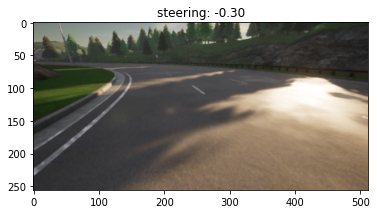

In [ ]:
# X,Y 데이터 시각화 확인

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def load_image(img_name):
    # https://m.blog.naver.com/nostresss12/221950215408

    # img_name_path = '/content/dataset/images/'
    path = os.path.join(data_dir, 'images', img_name)
    img_data = Image.open(path).convert("RGB")
    return img_data

def visualize_data(img_name, label):

    img = load_image(img_name)
    print("Image shape: ", np.array(img).shape)
    
    plt.imshow(img)
    plt.title("steering: {:.2f}".format(label))
    plt.show()


i = np.random.choice(label_df.index)
img_name = label_df['img'][i]
# print(img_name)
label = label_df[label_df['img'] == img_name]['steer'].values[0]
print("Index: ", i)
print("Image name: ", img_name)
print("Steer: ", label)

visualize_data(img_name, label)

# 3. 딥러닝 모델 생성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def get_model():

    ## sequentail() 입력에서 조향각을 출력할 때 순차적으로 진행되기 때문에 사용 add만 사용해서 , 구조가 간단, 
    model = Sequential()
    # ▼▼▼▼ Nvidia의 End-to-End 모델 구현 ▼▼▼▼
    # input data shape: (None, 256, 512, 3)
    # output data shape: (None, 1)
    
    #raise NotImplementedError

    model.add(Conv2D(24, 5, padding='valid', activation='relu', input_shape=(256,512,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(36, 5, padding='valid', activation='relu', input_shape=(256,512,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(48, 5, padding='valid', activation='relu', input_shape=(256,512,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))   
    model.add(Conv2D(64, 5, padding='valid', activation='relu', input_shape=(256,512,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(64, 5, padding='valid', activation='relu', input_shape=(256,512,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1)) # linear 라는 의미 sigmoid를 넣는 거랑 안 넣는거 차이 
#   # strides, padding, parameter, maxpooling 사이즈 시험 

    # ▲▲▲▲ Nvidia의 End-to-End 모델 구현 ▲▲▲▲

    return model

model = get_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 508, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 254, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 250, 36)      21636     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 125, 36)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 121, 48)       43248     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 60, 48)       0

# 4. 학습 및 검증 데이터 분할

In [ ]:
# Set the number of training and validation data
VAL_RATIO = 0.2

len_val = int(np.ceil(len(label_df) * VAL_RATIO))
len_train = int(len(label_df) - len_val)

print(len(label_df), len_train, len_val)

def split_train_val(df, val_ratio):
    '''입력받은 데이터프레임를 ratio 기준으로 
    학습용 데이터프레임과 검증용 데이터프레임으로 분할
    입력 df: 데이터프레임
    입력 val_ratio: 검증데이터 비율
    출력 train_df: 학습용 데이터프레임
    출력 val_df: 검증용 데이터프레임'''
    
    ############ advance -> 전이학습 사용. 파인튜닝해봐도 ㄱㅊ, 성능개선여부 모름 ㅋ 
        
    # ▼▼▼▼ split_train_val 함수 구현을 위한 코드 작성 ▼▼▼▼
    # df_train, df_val = df.split(val_ratio, shuffle = True)
    len_val = int(np.ceil(len(label_df) * val_ratio))
    len_train = int(len(label_df) - len_val)

    # df_train_indices = np.random.choice(df.index, len_train, replace=False)
    val_indices = np.random.choice(df.index, len_val, replace=False)
    df_val = df.iloc[val_indices].reset_index(drop=True)
    # df_train = df.iloc[df_train_indices].reset_index(drop=True)
    # 큰 수부터 제거 인덱스가 없어지는 것을 방지하기 위해
    # print(sorted(df_val_indices, reverse=True))
    df_train = df.drop(sorted(val_indices, reverse=True), axis = 0).reset_index(drop=True)
    print(df_val)
    print(df_train)
   

    # index 행 번호 맞추기 

    # raise NotImplementedError

    # ▲▲▲▲ split_train_val 함수 구현을 위한 코드 작성 ▲▲▲▲

    return df_train, df_val

label_train, label_val = split_train_val(label_df, VAL_RATIO)
print(len(label_df), len(label_train), len(label_val))

2165 1732 433
            img     steer
0    337376.jpg -0.057564
1    333090.jpg -0.083820
2    334013.jpg -0.187265
3     10003.jpg  0.169339
4    410473.jpg  0.030757
..          ...       ...
428  331340.jpg  0.027704
429   10016.jpg  0.109266
430  333450.jpg -0.085042
431  349371.jpg  0.022414
432  332620.jpg  0.016512

[433 rows x 2 columns]
             img     steer
0     329571.jpg  0.019361
1     329580.jpg  0.090791
2     329590.jpg  0.090791
3     329603.jpg -0.007297
4     329628.jpg -0.100309
...          ...       ...
1727   10507.jpg  0.111302
1728   10509.jpg  0.125961
1729   10510.jpg  0.136753
1730   10511.jpg  0.142251
1731   10512.jpg  0.129219

[1732 rows x 2 columns]
2165 1732 433


In [ ]:
# Duplication Check
for i in range(len(label_train)):
    for j in range(len(label_val)):
        if label_train.loc[i, 'img'] == label_val.loc[j, 'img']:
            print("{}th of train-set and {}th of validation-set are the same data.".format(i, j))
            print("Deduplication is needed")
            break

# 5. 데이터로더 생성

In [ ]:
from tensorflow.keras.utils import Sequence
import math

# https://minimin2.tistory.com/100
class DataLoader(Sequence):
    def __init__(self, label_df, batch_size, shuffle=False):
        self.label_df = label_df
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
        self.x_min = -0.5
        self.x_max = 0.5
        
    def on_epoch_end(self):
        self.indices = np.arange(len(self.label_df))
        if self.shuffle == True:
            np.random.shuffle(self.indices)
    
    def __len__(self):
        return math.ceil(len(self.label_df) / self.batch_size)
    
    def __getitem__(self, idx):
    
        indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        
        batch_x = [self.label_df.iloc[i, 0] for i in indices]
        batch_y = [self.label_df.iloc[i, 1] for i in indices] ## 조향각이 들어옴

        # ▼▼▼▼ batch_x 변수에 이미지 데이터 로드 ▼▼▼▼
        # np.array(batch_x).shape = (batch_size, 256, 512, 3)
        batch_x = [np.array(load_image(img_name)) /255. for img_name_x in batch_x]

        # ▲▲▲▲ batch_x 변수에 이미지 데이터 로드 ▲▲▲▲


        # ▼▼▼▼ batch_y Min-Max Normalization ▼▼▼▼
        batch_y = [self.min_max_normalize(y) for y in batch_y]
## batch_x = [np.array(load_image(img_name)) /255. for img_nam_x in bathc]
## batch_y = [np.array(self.min_max_normalize(y) for y in batch_y)]
        # ▲▲▲▲ batch_y Min-Max Normalization ▲▲▲▲
        
        return np.array(batch_x), np.array(batch_y)

    def min_max_normalize(self, x):

        # raise NotImplementedError
        x_scaled = (x - self.x_min) / (self.x_max - self.x_min)

        return x_scaled

In [ ]:
total_data_loader = DataLoader(label_df = label_df, batch_size = 5, shuffle = False)
x, y = total_data_loader[0]
print(x.shape)
print(y.shape)
# print(x)
print(y)

(5, 256, 512, 3)
(5,)
[0.51936109 0.59079081 0.59079081 0.4927032  0.44304679]


In [ ]:
# 학습 및 검증 데이터로더 생성
batch_size = 16
train_data_loader = DataLoader(label_df = label_train, 
                               batch_size = batch_size, 
                               shuffle = True)

val_data_loader = DataLoader(label_df = label_val, 
                             batch_size = batch_size, 
                             shuffle = True)

# 6. 학습 설정

In [ ]:
LOSS = 'mse'
OPTIMIZER = 'adam'
METRIC = 'mae'
# rmse, loss, metric 퀴즈. 
model.compile(loss = LOSS,
              optimizer = OPTIMIZER,
              metrics = [METRIC])

# 7. 모델 학습

In [ ]:
from tensorflow.keras import callbacks
epochs = 10

# 학습 종료 시점에 대한 고찰
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
### 과제에 사용. , check point 사용. 

# earlyStopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(x = train_data_loader,
                    validation_data = val_data_loader,
                    epochs = epochs)
# callbacks=[earlyStopping]

Epoch 1/10
109/109 [==============================] - 24s 213ms/step - loss: 0.0255 - mae: 0.1163 - val_loss: 0.0258 - val_mae: 0.1169
Epoch 2/10
109/109 [==============================] - 23s 209ms/step - loss: 0.0254 - mae: 0.1161 - val_loss: 0.0259 - val_mae: 0.1169
Epoch 3/10
109/109 [==============================] - 23s 208ms/step - loss: 0.0254 - mae: 0.1160 - val_loss: 0.0258 - val_mae: 0.1169
Epoch 4/10
109/109 [==============================] - 23s 210ms/step - loss: 0.0254 - mae: 0.1161 - val_loss: 0.0258 - val_mae: 0.1169
Epoch 5/10
109/109 [==============================] - 23s 209ms/step - loss: 0.0254 - mae: 0.1161 - val_loss: 0.0258 - val_mae: 0.1169
Epoch 6/10
109/109 [==============================] - 23s 209ms/step - loss: 0.0254 - mae: 0.1161 - val_loss: 0.0258 - val_mae: 0.1169
Epoch 7/10
109/109 [==============================] - 23s 210ms/step - loss: 0.0254 - mae: 0.1162 - val_loss: 0.0258 - val_mae: 0.1169
Epoch 8/10
109/109 [==============================] - 2

# 8. 학습이 완료된 모델 저장

In [ ]:
model.save('Mymodel')
!zip -r Mymodel.zip Mymodel/*

  adding: My_model/assets/ (stored 0%)
  adding: My_model/keras_metadata.pb (deflated 94%)
  adding: My_model/saved_model.pb (deflated 89%)
  adding: My_model/variables/ (stored 0%)
  adding: My_model/variables/variables.data-00000-of-00001 (deflated 42%)
  adding: My_model/variables/variables.index (deflated 70%)


# 9. 제출 전 저장된 모델이 정상적으로 로드되는지 확인!

In [ ]:
from tensorflow.keras.models import load_model

!unzip Mymodel.zip -d check_folder/

loaded_model = load_model('check_folder/Mymodel')
print(loaded_model.summary())

loaded_model.evaluate(x = val_data_loader)

Archive:  My_model.zip
   creating: Check/My_model/assets/
  inflating: Check/My_model/keras_metadata.pb  
  inflating: Check/My_model/saved_model.pb  
   creating: Check/My_model/variables/
  inflating: Check/My_model/variables/variables.data-00000-of-00001  
  inflating: Check/My_model/variables/variables.index  
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 508, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 254, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 250, 36)      21636     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 125, 36)      0         
 2D

[0.016220204532146454, 0.09329680353403091]

# 10. 정상적으로 저장되었다면 `my_model.zip` 파일을 `학번_이름_과제2.zip`으로 변경해서 제출하시오.